In [1]:
import datetime as dt
from datetime import datetime as dtdt

import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import ticker
from matplotlib.dates import DateFormatter, date2num
from pandas import DataFrame, Series

sns.set()

In [2]:
df_0 = pd.read_csv(
    '/Users/iomacbookair2/Documents/lab/DEIM2023/experiment1/annkw/similarity_all.csv')
ex1 = pd.read_csv('/Users/iomacbookair2/Documents/lab/DEIM2023/experiment1/annkw/audrey_1.csv')
ex2 = pd.read_csv('/Users/iomacbookair2/Documents/lab/DEIM2023/experiment1/annkw/audrey_2.csv')
ex3 = pd.read_csv('/Users/iomacbookair2/Documents/lab/DEIM2023/experiment1/annkw/audrey_3.csv')
ex4 = pd.read_csv('/Users/iomacbookair2/Documents/lab/DEIM2023/experiment1/annkw/audrey_4.csv')

In [3]:
df = df_0.copy()
df = df.drop(['q1'], axis=1)[72:91].reset_index()
df['lag0'] = df['mean']
df = df.drop('index', axis=1)
df = df.drop('mean', axis=1)
df = df.drop('q2', axis=1)
df = df.drop('q3', axis=1)
df = df.drop('stdev', axis=1)
df1 = df_0.copy()
df1 = df1.drop(['q1'], axis=1)[73:92].reset_index()
df['lag1'] = df1['mean']
df2 = df_0.copy()
df2 = df2.drop(['q1'], axis=1)[74:93].reset_index()
df['lag2'] = df2['mean']
df3 = df_0.copy()
df3 = df3.drop(['q1'], axis=1)[75:94].reset_index()
df['lag3'] = df3['mean']
df4 = df_0.copy()
df4 = df4.drop(['q1'], axis=1)[76:95].reset_index()
df['lag4'] = df4['mean']


In [4]:
df['ex1'] = ex1['interest']
df['ex2'] = ex2['interest']
df['ex3'] = ex3['interest']
df['ex4'] = ex4['interest']
df['ave'] = df[['ex1', 'ex2', 'ex3', 'ex4']].mean(axis=1)
df = df.drop('ex1', axis=1)
df = df.drop('ex2', axis=1)
df = df.drop('ex3', axis=1)
df = df.drop('ex4', axis=1)
df

,created_at,lag0,lag1,lag2,lag3,lag4,ave
0,2022-01-16 02:12:00,0.299947,0.330264,0.330927,0.284497,0.253486,1.75
1,2022-01-16 02:13:00,0.330264,0.330927,0.284497,0.253486,0.358574,2.50
2,2022-01-16 02:14:00,0.330927,0.284497,0.253486,0.358574,0.323486,2.50
3,2022-01-16 02:15:00,0.284497,0.253486,0.358574,0.323486,0.353093,3.25
4,2022-01-16 02:16:00,0.253486,0.358574,0.323486,0.353093,0.338926,3.00
5,2022-01-16 02:17:00,0.358574,0.323486,0.353093,0.338926,0.451748,3.00
6,2022-01-16 02:18:00,0.323486,0.353093,0.338926,0.451748,0.439803,3.25
7,2022-01-16 02:19:00,0.353093,0.338926,0.451748,0.439803,0.345725,2.75
8,2022-01-16 02:20:00,0.338926,0.451748,0.439803,0.345725,0.361795,3.75
9,2022-01-16 02:21:00,0.451748,0.439803,0.345725,0.361795,0.363492,3.00


In [5]:
df_corr = df.corr()
df_corr

/var/folders/6j/lgj8d7m91v7d19xc2r4wgwlr0000gn/T/ipykernel_26505/1378791828.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,lag0,lag1,lag2,lag3,lag4,ave
lag0,1.000000,0.436608,0.156955,0.125138,0.197024,0.041383
lag1,0.436608,1.000000,0.394053,0.129009,0.062242,0.157486
lag2,0.156955,0.394053,1.000000,0.404100,0.052703,0.152175
lag3,0.125138,0.129009,0.404100,1.000000,0.365926,0.238314
lag4,0.197024,0.062242,0.052703,0.365926,1.000000,0.519623
ave,0.041383,0.157486,0.152175,0.238314,0.519623,1.000000


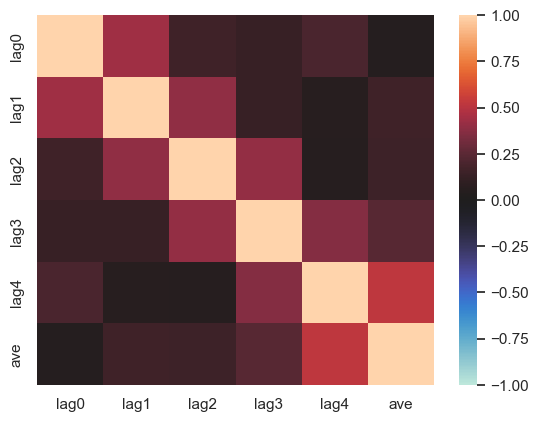

In [6]:
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)
plt.savefig('heatmap.png')